In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Gagan\University\Sem 5\Discrete Maths\Project\Graph-Theory-for-Portfolio-Optimization\ind_nifty500list.csv")
df

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027


In [2]:
df['Symbol'] = df['Symbol'] + '.NS'

industry_abbr = {
    'Financial Services': 'FIN',
    'Diversified': 'DIV',
    'Capital Goods': 'CAP',
    'Construction Materials': 'CON',
    'Chemicals': 'CHE',
    'Healthcare': 'HEA',
    'Power': 'POW',
    'Metals & Mining': 'MET',
    'Services': 'SER',
    'Oil Gas & Consumable Fuels': 'OIL',
    'Fast Moving Consumer Goods': 'FMC',
    'Consumer Services': 'CSV',
    'Forest Materials': 'FOR',
    'Information Technology': 'IT',
    'Textiles': 'TEX',
    'Automobile and Auto Components': 'AUT',
    'Consumer Durables': 'CND',
    'Realty': 'REA',
    'Telecommunication': 'TEL',
    'Construction': 'CST',
    'Media Entertainment & Publication': 'MED'
}

df['Industry_Abbr'] = df['Industry'].map(industry_abbr)
df['Industry_Symbol_Abbr'] = df['Industry_Abbr'] + '_' + df['Symbol']
df

,Company Name,Industry,Symbol,Series,ISIN Code,Industry_Abbr,Industry_Symbol_Abbr
0,360 ONE WAM Ltd.,Financial Services,360ONE.NS,EQ,INE466L01038,FIN,FIN_360ONE.NS
1,3M India Ltd.,Diversified,3MINDIA.NS,EQ,INE470A01017,DIV,DIV_3MINDIA.NS
2,ABB India Ltd.,Capital Goods,ABB.NS,EQ,INE117A01022,CAP,CAP_ABB.NS
3,ACC Ltd.,Construction Materials,ACC.NS,EQ,INE012A01025,CON,CON_ACC.NS
4,AIA Engineering Ltd.,Capital Goods,AIAENG.NS,EQ,INE212H01026,CAP,CAP_AIAENG.NS
...,...,...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL.NS,EQ,INE256A01028,MED,MED_ZEEL.NS
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH.NS,EQ,INE520A01027,IT,IT_ZENSARTECH.NS
497,Zomato Ltd.,Consumer Services,ZOMATO.NS,EQ,INE758T01015,CSV,CSV_ZOMATO.NS
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE.NS,EQ,INE010B01027,HEA,HEA_ZYDUSLIFE.NS


In [3]:
import yfinance as yf

tickers = df['Symbol'].to_list()
data = yf.download(tickers, start = "2014-04-01", end = "2024-03-31")["Close"]
data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data

[*********************100%***********************]  500 of 500 completed

20 Failed downloads:
['BHARTIHEXA.NS', 'AEGISLOG.NS', 'UNITDSPR.NS', 'GODIGIT.NS', 'AADHARHFC.NS', 'EMCURE.NS', 'INDGN.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-04-01 -> 2024-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1396290600, endDate = 1711823400")')
['JUSTDIAL.NS', 'PEL.NS', 'TATACHEM.NS', 'CERA.NS', 'ATUL.NS', 'BEL.NS', 'WESTLIFE.NS', 'RATNAMANI.NS']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))
['TBOTEK.NS', 'JBMA.NS', 'WELSPUNLIV.NS', 'CLEAN.NS']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
['TV18BRDCST.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-04-01 -> 2024-03-31)')


Ticker,360ONE.NS,3MINDIA.NS,AADHARHFC.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ABREL.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,NaN,3588.250000,NaN,29.997639,NaN,771.089783,1787.650024,NaN,80.877281,365.049988,...,NaN,NaN,226.550003,210.393799,82.070000,273.399994,75.570000,2019.000000,NaN,205.220001
2014-04-02,NaN,3641.300049,NaN,29.912590,NaN,778.988159,1847.400024,NaN,82.700836,366.950012,...,NaN,NaN,242.449997,212.212555,84.129997,279.000000,77.620003,2007.650024,NaN,207.570007
2014-04-03,NaN,3640.000000,NaN,30.471476,NaN,762.374329,1835.250000,NaN,84.770821,363.200012,...,NaN,NaN,232.350006,210.356308,82.419998,280.750000,78.080002,2001.849976,NaN,202.800003
2014-04-04,NaN,3616.100098,NaN,30.155584,NaN,757.017944,1822.349976,NaN,83.883682,375.299988,...,NaN,NaN,239.449997,207.525055,84.629997,276.049988,76.099998,1956.800049,NaN,204.949997
2014-04-07,NaN,3655.000000,NaN,29.402302,NaN,745.034241,1806.500000,NaN,87.185806,372.750000,...,NaN,NaN,240.250000,208.837555,85.779999,274.549988,76.440002,1943.900024,NaN,202.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,673.400024,30049.250000,NaN,648.500000,1349.199951,5864.899902,27673.250000,173.449997,206.350006,1457.050049,...,NaN,NaN,1254.750000,500.450012,23.400000,140.899994,591.200012,15284.950195,169.649994,993.150024
2024-03-22,665.849976,30728.400391,NaN,655.299988,1356.099976,5967.399902,27067.099609,175.050003,205.350006,1459.300049,...,NaN,NaN,1237.449951,487.100006,23.900000,142.449997,590.299988,15359.400391,174.199997,999.750000
2024-03-26,650.299988,30487.150391,NaN,656.500000,1325.150024,5929.799805,26701.050781,177.100006,207.000000,1444.500000,...,NaN,NaN,1222.699951,479.850006,23.549999,139.250000,600.349976,14965.099609,182.600006,1017.049988


In [4]:
symbol_abbr = pd.Series(df.Industry_Symbol_Abbr.values, index = df.Symbol).to_dict()
data.rename(columns = symbol_abbr, inplace = True)
sector_sorted_columns = sorted(data.columns, key=lambda x: x.split('_')[0])
data = data[sector_sorted_columns]
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ARE&M.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_CRAFTSMAN.NS,...,TEL_ROUTE.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,162.300003,NaN,58.099998,2065.199951,242.332764,208.675003,10767.099609,439.600006,77.500000,NaN,...,NaN,187.418579,NaN,6.985024,6.700000,11.795000,6365.100098,1.480000,71.199997,NaN
2014-04-02,163.100006,NaN,58.750000,2053.600098,248.232529,215.199997,10641.650391,433.750000,79.400002,NaN,...,NaN,187.542770,NaN,7.224237,7.600000,11.610000,6230.149902,1.515000,70.730003,NaN
2014-04-03,166.899994,NaN,59.000000,2053.350098,247.667130,211.574997,10619.549805,415.450012,80.349998,NaN,...,NaN,187.511719,NaN,6.985024,7.600000,11.400000,6117.700195,1.510000,69.900002,NaN
2014-04-04,167.100006,NaN,58.849998,2028.900024,244.422256,212.699997,10226.849609,393.700012,81.500000,NaN,...,NaN,187.915298,NaN,7.272080,7.800000,11.405000,5938.649902,1.570000,68.400002,NaN
2014-04-07,166.000000,NaN,61.549999,2022.599976,241.079071,218.425003,10368.549805,398.450012,81.800003,NaN,...,NaN,181.551086,NaN,7.128552,7.900000,11.905000,5705.299805,1.565000,69.190002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,756.150024,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3972.350098,...,1603.449951,1908.199951,692.750000,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988,NaN
2024-03-22,468.350006,778.000000,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,4149.549805,...,1600.550049,1922.650024,687.000000,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988,NaN
2024-03-26,471.450012,774.200012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,4172.049805,...,1600.500000,1947.599976,673.000000,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994,NaN


In [5]:
# Function to identify stocks with more than two consecutive NaNs
def remove_stocks_with_consecutive_nans(data, max_consecutive_nans=2):
    # Create a mask to track NaNs (excluding 'Date' column)
    nan_mask = data.iloc[:, 1:].isna()  # Exclude the 'Date' column

    # Initialize a list to keep track of columns to drop
    columns_to_drop = []

    # Loop through each column (stock) to check for consecutive NaNs
    for col in nan_mask.columns:  # Iterate over columns except 'Date'
        # Check for consecutive NaNs in the column
        consecutive_nans = nan_mask[col].astype(int).groupby((~nan_mask[col]).cumsum()).cumsum()

        # If the maximum count of consecutive NaNs is greater than the threshold, mark the column for dropping
        if consecutive_nans.max() > max_consecutive_nans:
            columns_to_drop.append(col)

    # Drop the identified columns from the original DataFrame (preserving the Date column)
    data = data.drop(columns=columns_to_drop)

    return data

# Remove stocks with more than two consecutive NaNs
data = remove_stocks_with_consecutive_nans(data)

data.to_csv("close_price.csv")
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_IDEA.NS,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,162.300003,58.099998,2065.199951,242.332764,208.675003,10767.099609,439.600006,77.500000,604.945007,122.300003,...,82.938385,203.750000,16.150000,187.418579,6.985024,6.700000,11.795000,6365.100098,1.480000,71.199997
2014-04-02,163.100006,58.750000,2053.600098,248.232529,215.199997,10641.650391,433.750000,79.400002,613.585022,124.849998,...,86.375313,203.050003,16.400000,187.542770,7.224237,7.600000,11.610000,6230.149902,1.515000,70.730003
2014-04-03,166.899994,59.000000,2053.350098,247.667130,211.574997,10619.549805,415.450012,80.349998,615.474976,124.099998,...,84.506111,199.100006,16.150000,187.511719,6.985024,7.600000,11.400000,6117.700195,1.510000,69.900002
2014-04-04,167.100006,58.849998,2028.900024,244.422256,212.699997,10226.849609,393.700012,81.500000,604.974976,122.900002,...,84.445808,199.800003,16.450001,187.915298,7.272080,7.800000,11.405000,5938.649902,1.570000,68.400002
2014-04-07,166.000000,61.549999,2022.599976,241.079071,218.425003,10368.549805,398.450012,81.800003,604.325012,124.449997,...,88.395264,200.250000,16.299999,181.551086,7.128552,7.900000,11.905000,5705.299805,1.565000,69.190002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3918.949951,305.799988,...,12.800000,250.199997,256.100006,1908.199951,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988
2024-03-22,468.350006,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,3988.399902,307.200012,...,13.300000,271.299988,261.000000,1922.650024,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988
2024-03-26,471.450012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,3911.100098,304.549988,...,13.300000,283.649994,252.649994,1947.599976,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994


In [6]:
import numpy as np
log_returns = np.log(data / data.shift(1))
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_IDEA.NS,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-02,0.004917,0.011126,-0.005633,0.024054,0.030790,-0.011720,-0.013397,0.024220,0.014181,0.020636,...,0.040604,-0.003441,0.015361,0.000662,0.033673,0.126041,-0.015809,-0.021430,0.023373,-0.006623
2014-04-03,0.023031,0.004246,-0.000122,-0.002280,-0.016988,-0.002079,-0.043106,0.011894,0.003075,-0.006025,...,-0.021878,-0.019645,-0.015361,-0.000166,-0.033673,0.000000,-0.018253,-0.018214,-0.003306,-0.011804
2014-04-04,0.001198,-0.002546,-0.011979,-0.013188,0.005303,-0.037680,-0.053773,0.014211,-0.017207,-0.009717,...,-0.000714,0.003510,0.018405,0.002150,0.040274,0.025976,0.000439,-0.029704,0.038966,-0.021693
2014-04-07,-0.006605,0.044858,-0.003110,-0.013772,0.026560,0.013761,0.011993,0.003674,-0.001075,0.012533,...,0.045708,0.002250,-0.009160,-0.034454,-0.019934,0.012739,0.042907,-0.040086,-0.003190,0.011484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.012702,0.008475,0.006535,0.022642,0.017588,0.011639,0.014327,...,0.003914,-0.001996,0.029924,0.010483,0.001919,0.016776,0.013825,0.025519,0.017724,0.015241
2024-03-22,0.015818,0.019691,0.022000,-0.014611,0.024161,0.003733,0.025328,0.008792,0.017566,0.004568,...,0.038319,0.080965,0.018952,0.007544,0.003827,0.011030,-0.009027,0.010417,0.043629,0.014329
2024-03-26,0.006597,-0.003775,0.001709,-0.004249,0.001062,0.016486,0.012951,-0.001010,-0.019571,-0.008664,...,0.000000,0.044516,-0.032515,0.012893,-0.024486,-0.025927,0.039814,0.004624,-0.032876,0.004769


In [7]:
log_returns = log_returns.dropna(axis=1, how='all')
log_returns = log_returns.drop(log_returns.index[0])
log_returns.to_csv("log_returns.csv")
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_IDEA.NS,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-02,0.004917,0.011126,-0.005633,0.024054,0.030790,-0.011720,-0.013397,0.024220,0.014181,0.020636,...,0.040604,-0.003441,0.015361,0.000662,0.033673,0.126041,-0.015809,-0.021430,0.023373,-0.006623
2014-04-03,0.023031,0.004246,-0.000122,-0.002280,-0.016988,-0.002079,-0.043106,0.011894,0.003075,-0.006025,...,-0.021878,-0.019645,-0.015361,-0.000166,-0.033673,0.000000,-0.018253,-0.018214,-0.003306,-0.011804
2014-04-04,0.001198,-0.002546,-0.011979,-0.013188,0.005303,-0.037680,-0.053773,0.014211,-0.017207,-0.009717,...,-0.000714,0.003510,0.018405,0.002150,0.040274,0.025976,0.000439,-0.029704,0.038966,-0.021693
2014-04-07,-0.006605,0.044858,-0.003110,-0.013772,0.026560,0.013761,0.011993,0.003674,-0.001075,0.012533,...,0.045708,0.002250,-0.009160,-0.034454,-0.019934,0.012739,0.042907,-0.040086,-0.003190,0.011484
2014-04-09,0.011679,0.010505,0.004292,0.004070,0.013528,-0.000275,0.014451,0.182220,0.028056,0.006008,...,-0.004444,-0.021707,0.018238,0.006307,0.033006,0.037271,0.054355,-0.002193,-0.066031,-0.000289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.012702,0.008475,0.006535,0.022642,0.017588,0.011639,0.014327,...,0.003914,-0.001996,0.029924,0.010483,0.001919,0.016776,0.013825,0.025519,0.017724,0.015241
2024-03-22,0.015818,0.019691,0.022000,-0.014611,0.024161,0.003733,0.025328,0.008792,0.017566,0.004568,...,0.038319,0.080965,0.018952,0.007544,0.003827,0.011030,-0.009027,0.010417,0.043629,0.014329
2024-03-26,0.006597,-0.003775,0.001709,-0.004249,0.001062,0.016486,0.012951,-0.001010,-0.019571,-0.008664,...,0.000000,0.044516,-0.032515,0.012893,-0.024486,-0.025927,0.039814,0.004624,-0.032876,0.004769


In [8]:
correlation_matrix = log_returns.corr()
correlation_matrix

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_IDEA.NS,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
AUT_APOLLOTYRE.NS,1.000000,0.297176,0.338603,0.375199,0.418001,0.377815,0.519110,0.276910,0.373968,0.426710,...,0.185890,0.188445,0.238211,0.262217,0.188373,0.150543,0.299203,0.263712,0.281813,0.201221
AUT_ASAHIINDIA.NS,0.297176,1.000000,0.233677,0.190699,0.276953,0.277182,0.239251,0.221586,0.267855,0.298543,...,0.144263,0.179541,0.186717,0.214801,0.168242,0.132054,0.224273,0.194819,0.256328,0.209202
AUT_BAJAJ-AUTO.NS,0.338603,0.233677,1.000000,0.224306,0.347067,0.334242,0.246672,0.218940,0.398097,0.323197,...,0.150669,0.147747,0.173713,0.197058,0.133792,0.097935,0.211685,0.257810,0.199055,0.144128
AUT_BALKRISIND.NS,0.375199,0.190699,0.224306,1.000000,0.306774,0.266262,0.275670,0.175272,0.292925,0.276473,...,0.135384,0.151774,0.185017,0.191767,0.098401,0.109036,0.217636,0.224391,0.182695,0.135579
AUT_BHARATFORG.NS,0.418001,0.276953,0.347067,0.306774,1.000000,0.404928,0.293783,0.239229,0.384208,0.372709,...,0.158103,0.167677,0.233147,0.265254,0.176973,0.123061,0.317977,0.262813,0.258946,0.202209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEX_ALOKINDS.NS,0.150543,0.132054,0.097935,0.109036,0.123061,0.118501,0.131023,0.083423,0.093931,0.156734,...,0.208178,0.129350,0.146524,0.138107,0.133013,1.000000,0.125703,0.077048,0.185537,0.159450
TEX_KPRMILL.NS,0.299203,0.224273,0.211685,0.217636,0.317977,0.253543,0.228033,0.219754,0.244056,0.268805,...,0.124165,0.148166,0.208459,0.196585,0.159188,0.125703,1.000000,0.169932,0.263264,0.271990
TEX_PAGEIND.NS,0.263712,0.194819,0.257810,0.224391,0.262813,0.272521,0.215229,0.187796,0.308562,0.298917,...,0.120976,0.093797,0.149642,0.194692,0.093932,0.077048,0.169932,1.000000,0.169499,0.118438


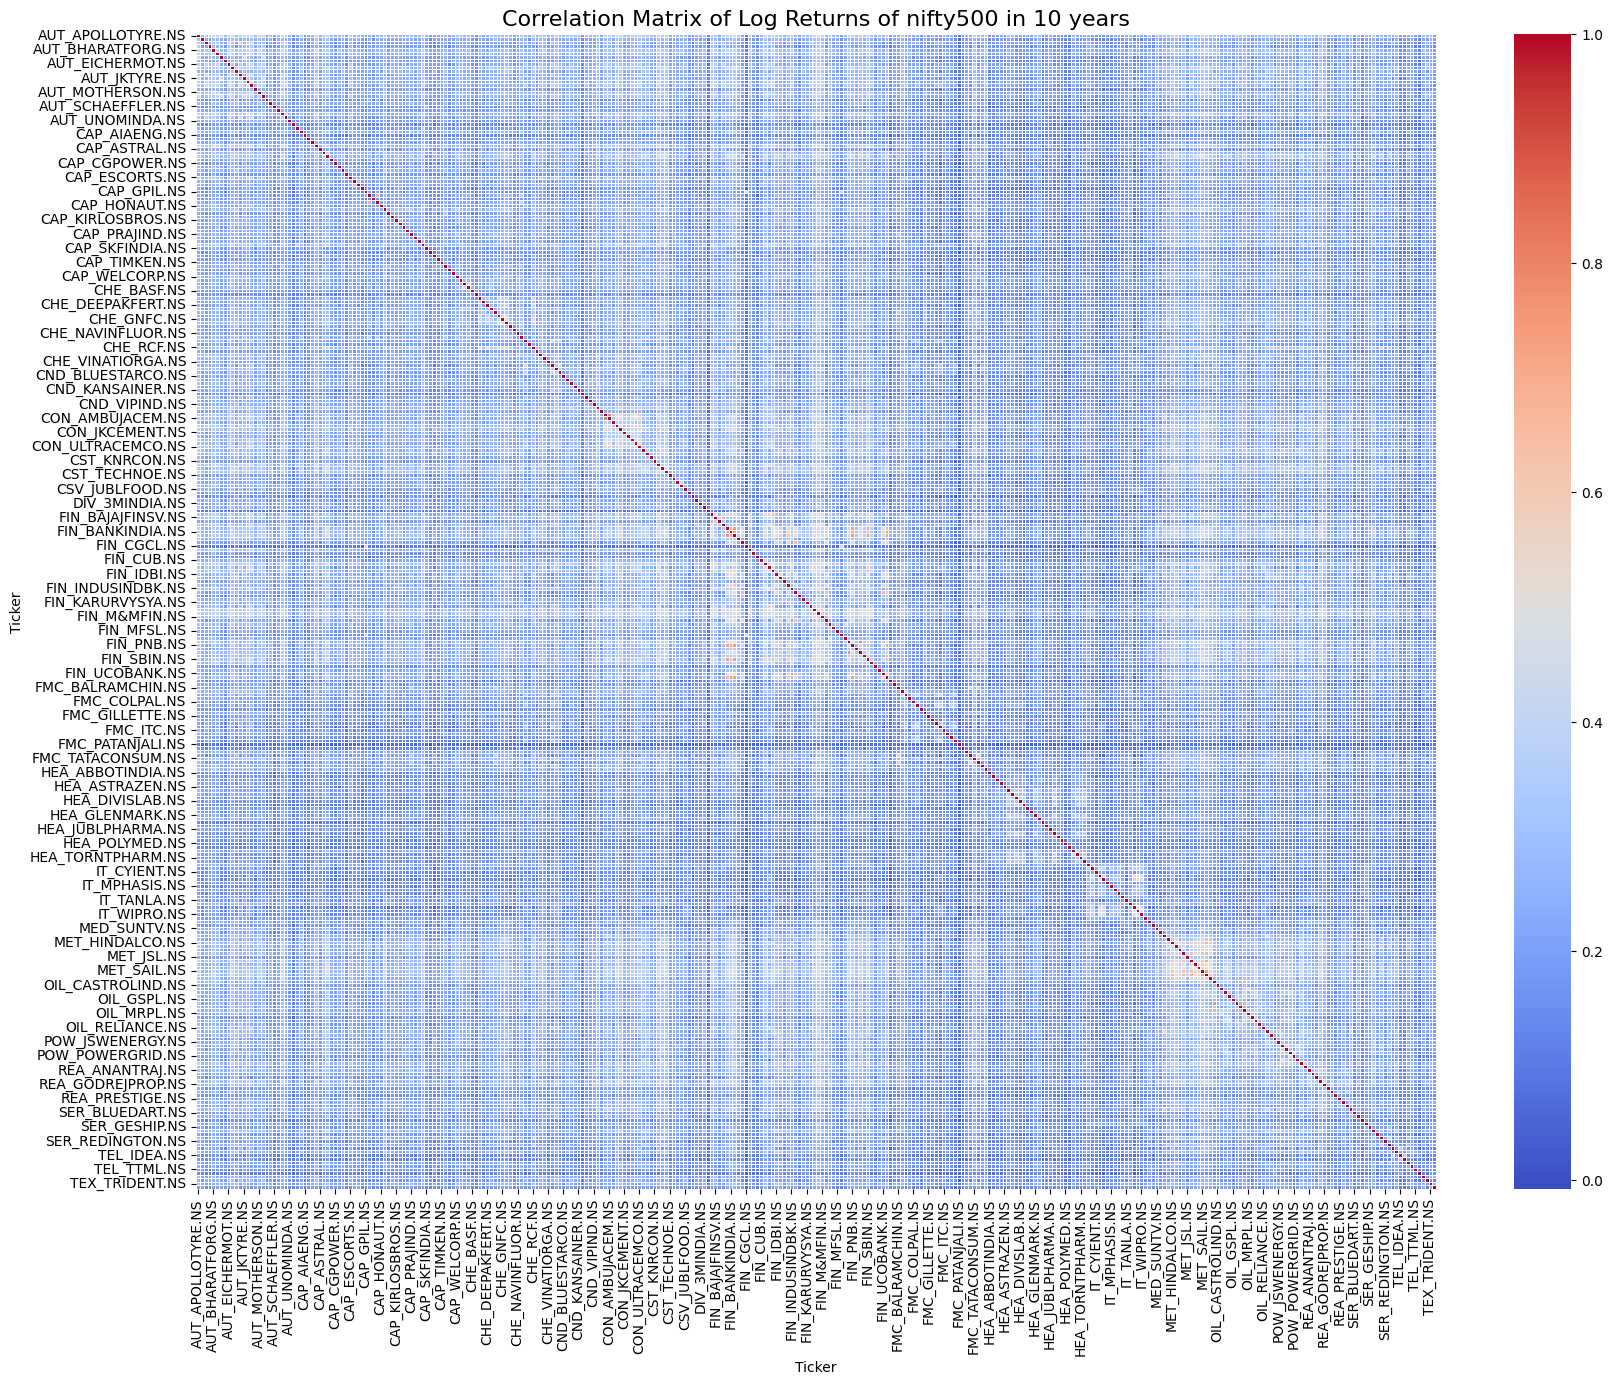

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Log Returns of nifty500 in 10 years", fontsize=16)
plt.savefig('Correlation Matrix of Log Returns of nifty500 in 10 years.png')
plt.show()

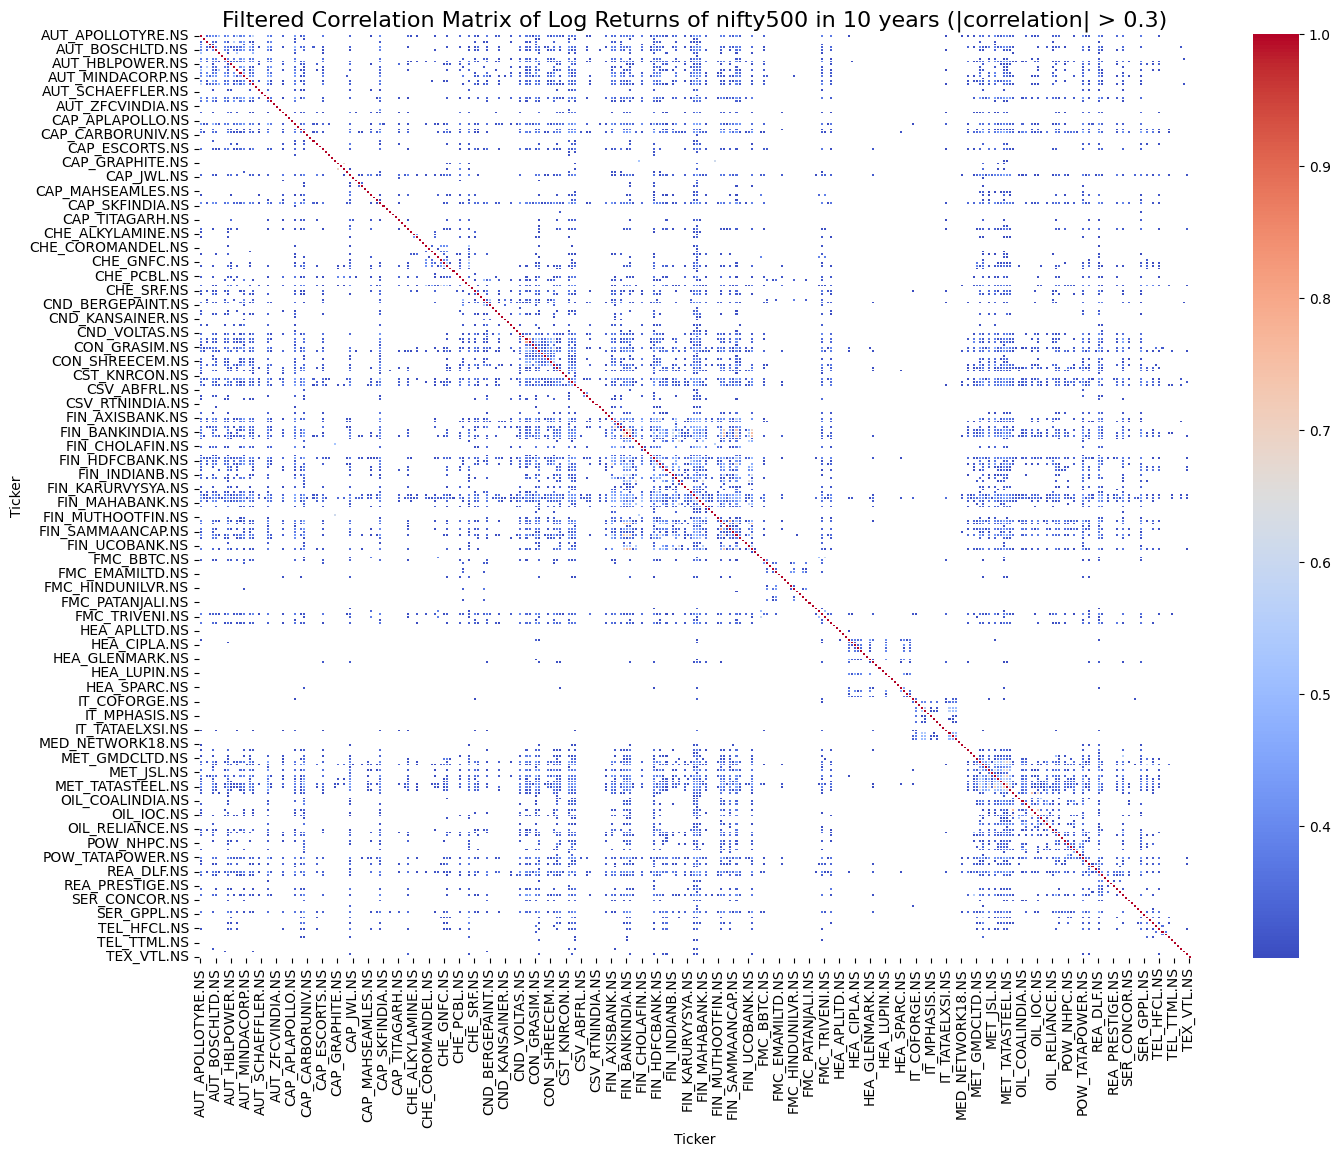

In [12]:
# Only display correlations with absolute values above 0.3
filtered_correlation = correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)]

plt.figure(figsize=(16,12))
sns.heatmap(filtered_correlation, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Filtered Correlation Matrix of Log Returns of nifty500 in 10 years (|correlation| > 0.3)", fontsize=16)
plt.savefig('Filtered Correlation Matrix of Log Returns of nifty500 in 10 years.png')
plt.show()


In [13]:
import numpy as np
import pandas as pd
import networkx as nx
import community as community_louvain

# Function to create clusters based on correlation threshold
def get_clusters(correlation_matrix, threshold):
    G = nx.Graph()
    
    # Add nodes
    for ticker in correlation_matrix.columns:
        G.add_node(ticker)

    # Add edges based on threshold
    for i, stock1 in enumerate(correlation_matrix.columns):
        for j, stock2 in enumerate(correlation_matrix.columns):
            if i < j:
                corr_value = correlation_matrix.loc[stock1, stock2]
                if abs(corr_value) < threshold:
                    G.add_edge(stock1, stock2, weight=corr_value)

    # Apply Louvain method
    partition = community_louvain.best_partition(G, weight='weight')
    
    # Organize nodes into clusters
    clusters = {}
    for node, cluster_id in partition.items():
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(node)
    
    return clusters

# Define a range of thresholds to test
thresholds = np.arange(0.1, 0.6, 0.1)  # Example thresholds from 0.1 to 0.5
all_clusters = {}

# Iterate through each threshold and collect clusters
for threshold in thresholds:
    clusters = get_clusters(correlation_matrix, threshold)
    all_clusters[threshold] = clusters

# Display the clusters for each threshold
for threshold, clusters in all_clusters.items():
    print(f"Threshold: {threshold}")
    for cluster_id, stocks in clusters.items():
        print(f"  Cluster {cluster_id}: {stocks}")

Threshold: 0.1
  Cluster 0: ['AUT_APOLLOTYRE.NS', 'AUT_ASAHIINDIA.NS', 'AUT_BHARATFORG.NS', 'AUT_BOSCHLTD.NS', 'AUT_CEATLTD.NS', 'AUT_CIEINDIA.NS', 'AUT_JKTYRE.NS', 'AUT_MOTHERSON.NS', 'AUT_TATAMOTORS.NS', 'CAP_ACE.NS', 'CAP_ASHOKLEY.NS', 'CAP_BEML.NS', 'CAP_BHEL.NS', 'CAP_CUMMINSIND.NS', 'CAP_ESCORTS.NS', 'CAP_FINCABLES.NS', 'CAP_KSB.NS', 'CAP_PRAJIND.NS', 'CAP_WELCORP.NS', 'CHE_AARTIIND.NS', 'CHE_BALAMINES.NS', 'CHE_CHAMBLFERT.NS', 'CHE_EIDPARRY.NS', 'CHE_GNFC.NS', 'CHE_GSFC.NS', 'CHE_PCBL.NS', 'CHE_RCF.NS', 'CHE_SRF.NS', 'CHE_UPL.NS', 'CND_WHIRLPOOL.NS', 'CON_ACC.NS', 'CON_AMBUJACEM.NS', 'CON_JKCEMENT.NS', 'CST_ENGINERSIN.NS', 'CST_IRB.NS', 'CST_NBCC.NS', 'CST_NCC.NS', 'CSV_ABFRL.NS', 'DIV_GODREJIND.NS', 'FIN_AXISBANK.NS', 'FIN_BAJAJFINSV.NS', 'FIN_BANKBARODA.NS', 'FIN_CANFINHOME.NS', 'FIN_CGCL.NS', 'FIN_CUB.NS', 'FIN_FEDERALBNK.NS', 'FIN_HDFCBANK.NS', 'FIN_INDUSINDBK.NS', 'FIN_LICHSGFIN.NS', 'FIN_LTF.NS', 'FIN_MANAPPURAM.NS', 'FIN_MCX.NS', 'FIN_PFC.NS', 'FIN_RECLTD.NS', 'FIN_SBIN.N

In [14]:
def girvan_newman_clustering(G):
    # Use the Girvan-Newman algorithm to find communities
    comp = nx.algorithms.community.girvan_newman(G)
    # Get the first partition of the graph
    return next(comp)

# Example of using the Girvan-Newman algorithm
G = nx.Graph()
# Add nodes and edges as before based on a correlation threshold
for i, stock1 in enumerate(correlation_matrix.columns):
    for j, stock2 in enumerate(correlation_matrix.columns):
        if i < j:
            corr_value = correlation_matrix.loc[stock1, stock2]
            if abs(corr_value) < 0.3:  # Use an appropriate threshold
                G.add_edge(stock1, stock2)

# Get clusters using Girvan-Newman
gn_clusters = girvan_newman_clustering(G)

# Display clusters from Girvan-Newman
for i, cluster in enumerate(gn_clusters):
    print(f"Girvan-Newman Cluster {i}: {list(cluster)}")

KeyboardInterrupt: 

In [39]:
# Collect results for sensitivity analysis
sensitivity_results = {}

for threshold in thresholds:
    clusters = get_clusters(correlation_matrix, threshold)
    sensitivity_results[threshold] = {
        'num_clusters': len(clusters),
        'clusters': clusters
    }

# Display the results
sensitivity_df = pd.DataFrame({
    'Threshold': [thresh for thresh in sensitivity_results.keys()],
    'Number of Clusters': [result['num_clusters'] for result in sensitivity_results.values()],
})

print(sensitivity_df)

   Threshold  Number of Clusters
0        0.1                   8
1        0.2                   3
2        0.3                   3
3        0.4                   3
4        0.5                   3


In [15]:
import networkx as nx

# Set a correlation threshold
threshold = 0.3

# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph (each stock ticker)
for ticker in correlation_matrix.columns:
    G.add_node(ticker)

# Add edges based on the threshold, with correlation as the weight
for i, stock1 in enumerate(correlation_matrix.columns):
    for j, stock2 in enumerate(correlation_matrix.columns):
        # Only consider each pair once and avoid self-loops
        if i < j:
            corr_value = correlation_matrix.loc[stock1, stock2]
            # Only add edge if correlation is below the threshold
            if abs(corr_value) < threshold:
                G.add_edge(stock1, stock2, weight=corr_value)

# Now G is a graph with nodes as stocks and edges for low-correlation pairs
# Print some info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 326
Number of edges: 47355


In [16]:
import community as community_louvain  # The python-louvain package

# Apply Louvain method on the graph
partition = community_louvain.best_partition(G, weight='weight')

# Organize nodes into clusters
clusters = {}
for node, cluster_id in partition.items():
    if cluster_id not in clusters:
        clusters[cluster_id] = []
    clusters[cluster_id].append(node)

# Display the clusters
print(f"Number of clusters found: {len(clusters)}")
for cluster_id, stocks in clusters.items():
    print(f"Cluster {cluster_id}: {stocks}")

Number of clusters found: 3
Cluster 0: ['AUT_APOLLOTYRE.NS', 'AUT_BAJAJ-AUTO.NS', 'AUT_BALKRISIND.NS', 'AUT_BHARATFORG.NS', 'AUT_EXIDEIND.NS', 'AUT_MOTHERSON.NS', 'AUT_SCHAEFFLER.NS', 'AUT_TATAMOTORS.NS', 'AUT_UNOMINDA.NS', 'AUT_ZFCVINDIA.NS', 'CAP_AIAENG.NS', 'CAP_APLAPOLLO.NS', 'CAP_ASHOKLEY.NS', 'CAP_ASTRAL.NS', 'CAP_BHEL.NS', 'CAP_GRINDWELL.NS', 'CAP_HONAUT.NS', 'CAP_JINDALSAW.NS', 'CAP_KSB.NS', 'CAP_SIEMENS.NS', 'CAP_SKFINDIA.NS', 'CAP_SUPREMEIND.NS', 'CAP_THERMAX.NS', 'CAP_TIMKEN.NS', 'CHE_ALKYLAMINE.NS', 'CHE_BASF.NS', 'CHE_BAYERCROP.NS', 'CHE_COROMANDEL.NS', 'CHE_LINDEINDIA.NS', 'CHE_NAVINFLUOR.NS', 'CHE_PIDILITIND.NS', 'CHE_PIIND.NS', 'CHE_VINATIORGA.NS', 'CND_ASIANPAINT.NS', 'CND_BERGEPAINT.NS', 'CND_KANSAINER.NS', 'CND_WHIRLPOOL.NS', 'CON_GRASIM.NS', 'CON_INDIACEM.NS', 'CST_LT.NS', 'CST_NCC.NS', 'CSV_NAUKRI.NS', 'DIV_3MINDIA.NS', 'FIN_BAJAJHLDNG.NS', 'FIN_CANBK.NS', 'FIN_CRISIL.NS', 'FIN_FEDERALBNK.NS', 'FIN_ICICIBANK.NS', 'FIN_LICHSGFIN.NS', 'FIN_LTF.NS', 'FIN_M&MFIN.NS', '

In [17]:
# Analyzing Cluster Properties

# Create a DataFrame to analyze cluster properties
cluster_analysis = pd.DataFrame({
    'Stock': log_returns.columns,
    'Cluster': [partition[stock] for stock in log_returns.columns]
})

# Add sector information for each stock
cluster_analysis['Sector'] = cluster_analysis['Stock'].apply(lambda x: x.split('_')[0])

# Display the cluster distribution
cluster_distribution = cluster_analysis['Cluster'].value_counts().sort_index()
print("Cluster Distribution:")
print(cluster_distribution)

Cluster Distribution:
Cluster
0    128
1     62
2    136
Name: count, dtype: int64


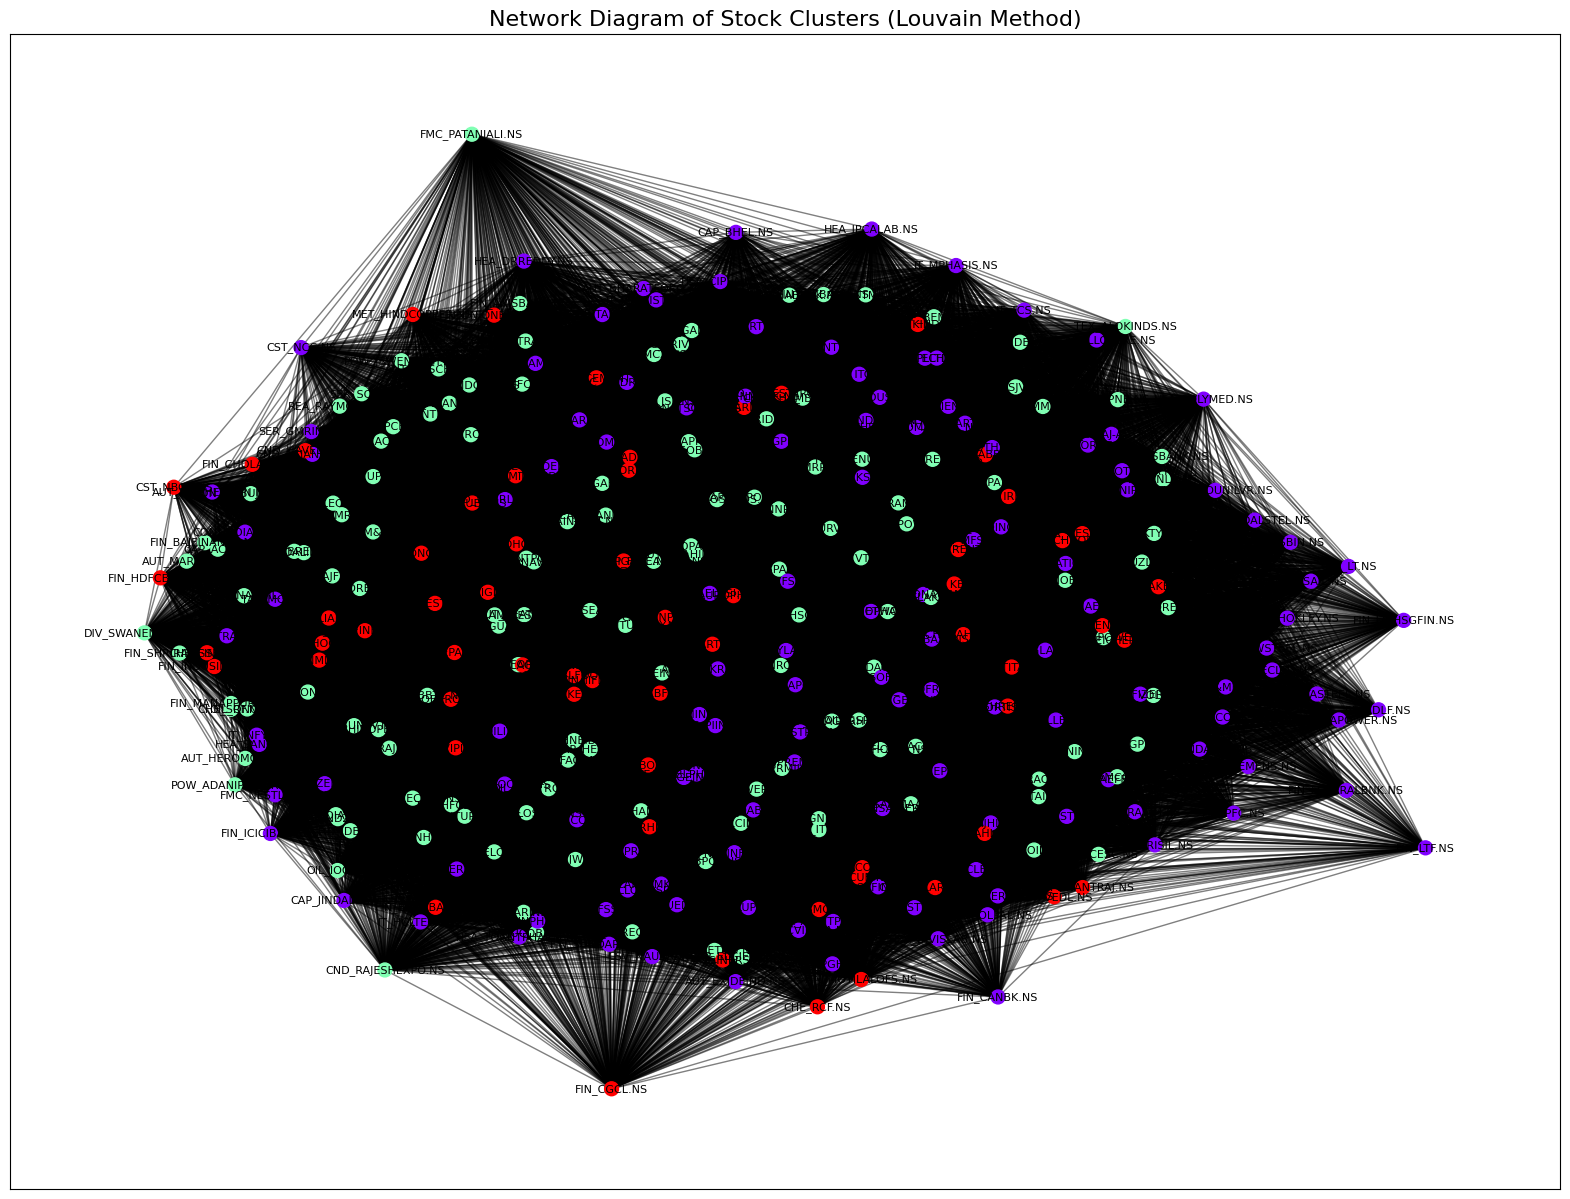

In [18]:
# Visualizing Clusters of Stocks Identified by Louvain Algorithm

# Assign cluster colors
color_map = []
cluster_colors = {cluster_id: i for i, cluster_id in enumerate(clusters.keys())}
for node in G.nodes():
    color_map.append(cluster_colors[partition[node]])

# Plot the graph with the clusters
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, seed=42)  # Generate the layout for visualization

# Draw nodes with cluster colors
nx.draw_networkx_nodes(G, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=100)

# Draw edges with weights below the threshold
edges = [(u, v) for u, v, d in G.edges(data=True) if abs(d['weight']) < threshold]
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)

# Add labels for each node
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Diagram of Stock Clusters (Louvain Method)", fontsize=16)
plt.show()

In [19]:
# Calculate the average log returns and volatility for each cluster
cluster_returns = {}
cluster_volatility = {}

for cluster_id, stocks in clusters.items():
    cluster_data = log_returns[stocks]
    cluster_returns[cluster_id] = cluster_data.mean().mean()  # Mean return of the cluster
    cluster_volatility[cluster_id] = cluster_data.std().mean()  # Average volatility of the cluster

# Create a DataFrame to summarize cluster statistics
cluster_summary = pd.DataFrame({
    'Cluster': list(clusters.keys()),
    'Average Return': [cluster_returns[cl] for cl in clusters.keys()],
    'Average Volatility': [cluster_volatility[cl] for cl in clusters.keys()],
    'Number of Stocks': [len(clusters[cl]) for cl in clusters.keys()]
})

cluster_summary.sort_values(by='Average Return', ascending=False, inplace=True)
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Average Return  Average Volatility  Number of Stocks
2        1        0.000805            0.024048                62
1        2        0.000752            0.027843               136
0        0        0.000698            0.021606               128


In [20]:
# Selecting Clusters for Portfolio Construction

# Display top clusters by average return
selected_clusters = cluster_summary.head(3)  # Select top 3 clusters with highest average return
print("Selected Clusters for Portfolio Construction:")
print(selected_clusters)

Selected Clusters for Portfolio Construction:
   Cluster  Average Return  Average Volatility  Number of Stocks
2        1        0.000805            0.024048                62
1        2        0.000752            0.027843               136
0        0        0.000698            0.021606               128


C:\Users\gagan\AppData\Local\Temp\ipykernel_13416\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


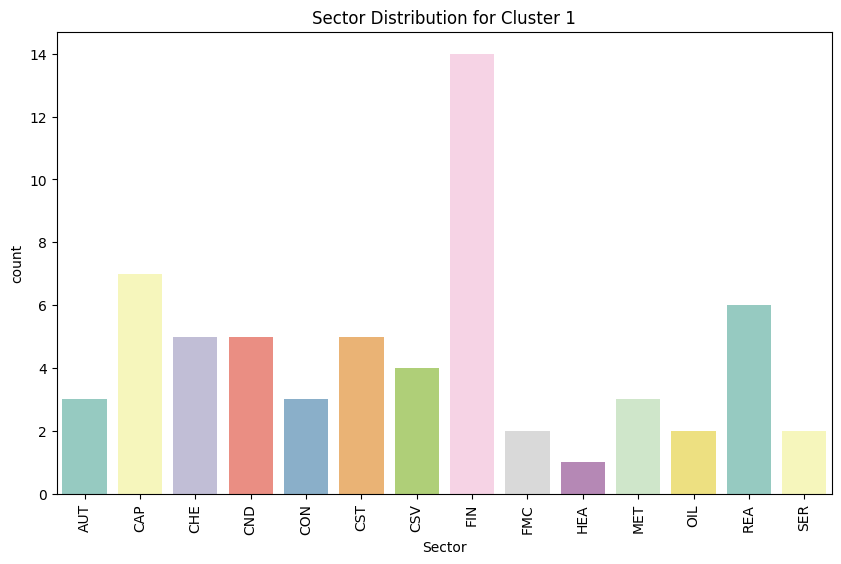

C:\Users\gagan\AppData\Local\Temp\ipykernel_13416\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


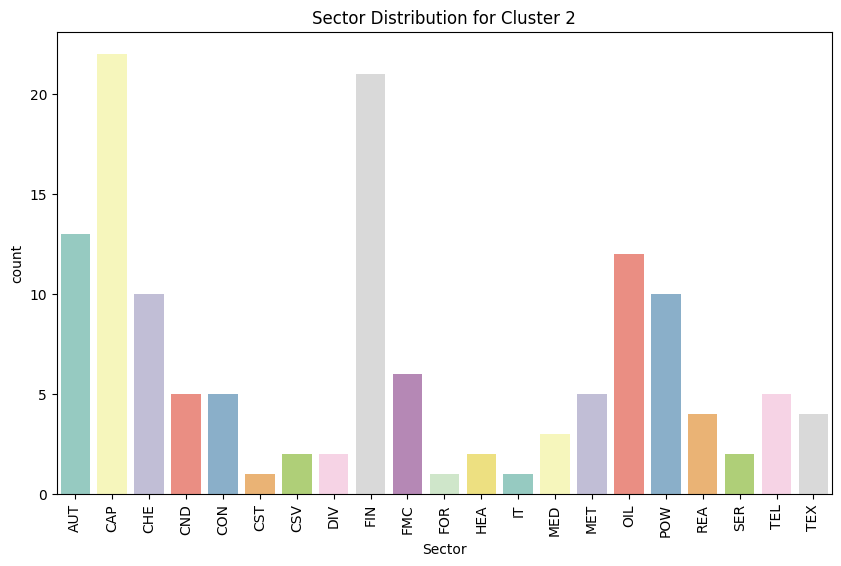

C:\Users\gagan\AppData\Local\Temp\ipykernel_13416\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


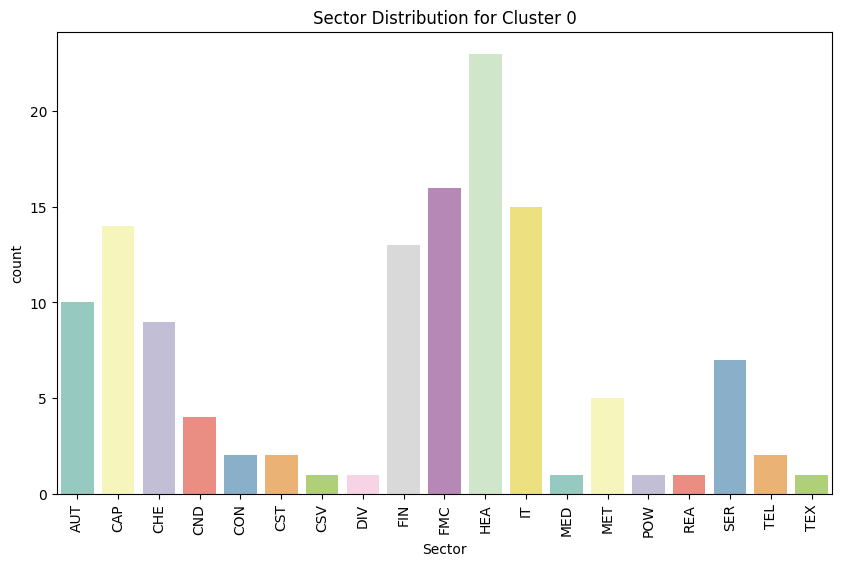

In [21]:
# Visualizing Sector Distribution in Selected Clusters

import seaborn as sns

for cluster_id in selected_clusters['Cluster']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')
    plt.title(f"Sector Distribution for Cluster {cluster_id}")
    plt.xticks(rotation=90)
    plt.show()

## Portfolio Construction and Backtesting of Selected Clusters

In [22]:
# Load the log returns data
log_returns = pd.read_csv("log_returns.csv", index_col=0, parse_dates=True)

# Define the selected clusters for portfolio construction
selected_clusters = [0, 1, 2]  # Replace with actual cluster IDs from previous analysis

# Get stocks for each selected cluster
selected_stocks = [stock for cluster_id in selected_clusters for stock in clusters[cluster_id]]
selected_log_returns = log_returns[selected_stocks]

# Equal weight allocation for simplicity
weights = np.ones(len(selected_stocks)) / len(selected_stocks)

# Calculate the portfolio's daily returns
portfolio_returns = selected_log_returns.dot(weights)

# Cumulative portfolio returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Load benchmark data (Nifty 500 index - #CRSLDX)
benchmark = yf.download("^CRSLDX", start="2014-04-01", end="2024-03-31")["Close"].pct_change().dropna()
cumulative_benchmark_returns = (1 + benchmark).cumprod()

[*********************100%***********************]  1 of 1 completed


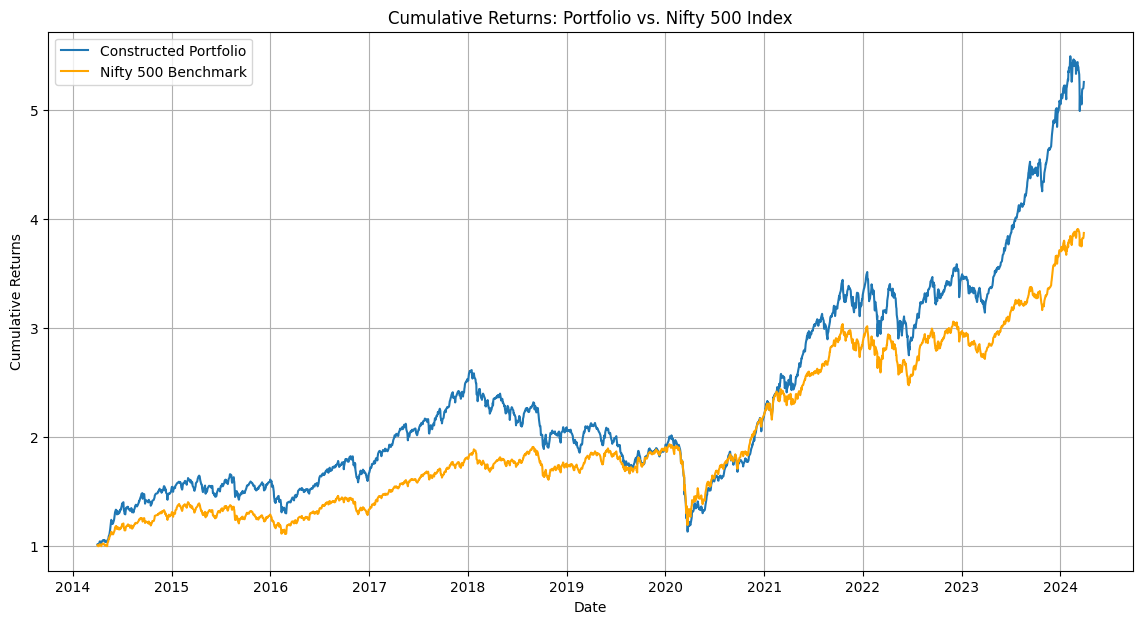

In [23]:
# Plotting cumulative returns for the portfolio and the benchmark
plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_returns, label="Constructed Portfolio")
plt.plot(cumulative_benchmark_returns, label="Nifty 500 Benchmark", color='orange')
plt.title("Cumulative Returns: Portfolio vs. Nifty 500 Index")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculate annualized return and volatility for the portfolio
annualized_return = portfolio_returns.mean() * 252
annualized_volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print("Portfolio Performance Metrics:")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Calculate benchmark performance metrics
benchmark_annualized_return = benchmark.mean() * 252
benchmark_annualized_volatility = benchmark.std() * np.sqrt(252)
benchmark_sharpe_ratio = benchmark_annualized_return / benchmark_annualized_volatility

print("\nBenchmark Performance Metrics:")
print(f"Annualized Return: {benchmark_annualized_return:.2%}")
print(f"Annualized Volatility: {benchmark_annualized_volatility:.2%}")
print(f"Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")

Portfolio Performance Metrics:
Annualized Return: 18.67%
Annualized Volatility: 18.21%
Sharpe Ratio: 1.02

Benchmark Performance Metrics:
Annualized Return: 15.25%
Annualized Volatility: 16.34%
Sharpe Ratio: 0.93


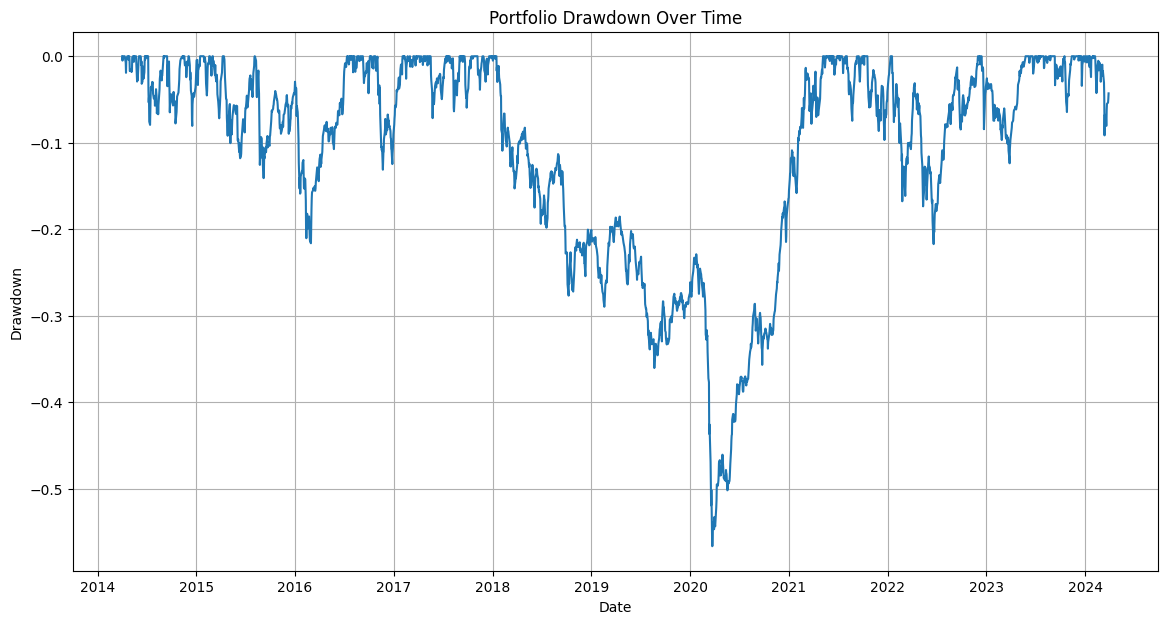

In [25]:
# Visualize the drawdowns of the portfolio
cumulative_max_portfolio = cumulative_portfolio_returns.cummax()
drawdown = (cumulative_portfolio_returns - cumulative_max_portfolio) / cumulative_max_portfolio

plt.figure(figsize=(14, 7))
plt.plot(drawdown, label="Portfolio Drawdown")
plt.title("Portfolio Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()

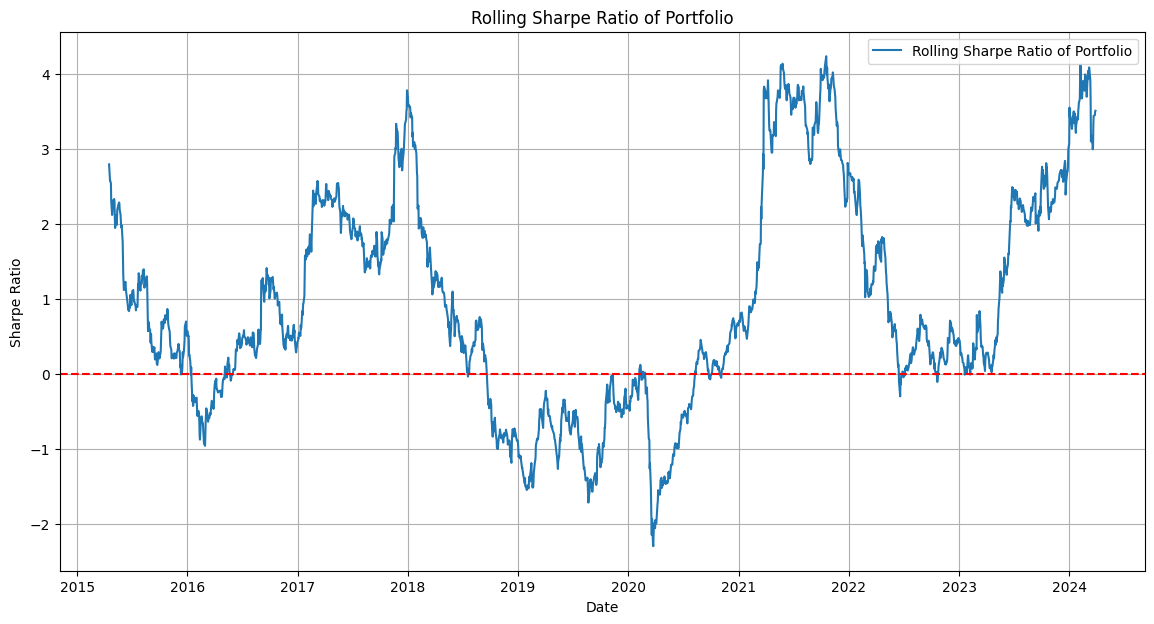

In [26]:
rolling_window = 252  # One year
rolling_sharpe_ratio = portfolio_returns.rolling(rolling_window).mean() / portfolio_returns.rolling(rolling_window).std() * np.sqrt(252)

plt.figure(figsize=(14, 7))
plt.plot(rolling_sharpe_ratio, label="Rolling Sharpe Ratio of Portfolio")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Rolling Sharpe Ratio of Portfolio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid(True)
plt.show()